In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib  # to save the model later


In [2]:
df_model = pd.read_csv("my_data.csv")
df_model.head()

,symptoms_text,diseases
0,"anxiety and nervousness, shortness of breath, ...",panic_disorder
1,"shortness of breath, depressive or psychotic s...",panic_disorder
2,"anxiety and nervousness, depression, shortness...",panic_disorder
3,"anxiety and nervousness, depressive or psychot...",panic_disorder
4,"anxiety and nervousness, depression, insomnia,...",panic_disorder


In [30]:
df_model.shape

(114312, 2)

In [3]:
# Assuming df_model has "symptoms_text" and "diseases" columns
X = df_model["symptoms_text"]
y = df_model["diseases"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
vectorizer = TfidfVectorizer(
    max_features=3000,      # limits features for speed
    ngram_range=(1, 2),     # captures phrases like "chest pain"
    stop_words="english"    # remove common words
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


                                             precision    recall  f1-score   support

                          actinic_keratosis       0.92      0.68      0.78       182
                        acute_bronchiolitis       0.92      0.93      0.92       241
                           acute_bronchitis       0.82      0.71      0.76       243
                         acute_bronchospasm       0.64      0.73      0.68       181
                        acute_kidney_injury       0.95      0.98      0.97       182
                         acute_pancreatitis       0.95      0.88      0.92       241
                            acute_sinusitis       0.83      0.90      0.86       181
                      acute_stress_reaction       0.90      0.96      0.93       182
                                    allergy       0.99      0.97      0.98       181
                                     angina       0.98      0.96      0.97       181
                                    anxiety       0.96      0.92

In [12]:
from sklearn.metrics import accuracy_score

# Train accuracy
y_train_pred = model.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Test accuracy
y_test_pred = model.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.8940
Test Accuracy: 0.8836


In [11]:
def predict_disease(symptoms_text):
    text_tfidf = vectorizer.transform([symptoms_text])
    prediction = model.predict(text_tfidf)[0]
    return prediction

# Example:
user_input = " anxiety and nervousness, shortness of breath,depression ,insomnia"
print("Predicted disease:", predict_disease(user_input))


Predicted disease: acute_stress_reaction


In [25]:
import random


In [18]:

X = df_model['symptoms_text']
y = df_model['diseases']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 4️⃣ TF-IDF vectorizer (fit only on train)
# -------------------------------
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

# -------------------------------
# 5️⃣ Define chatbot function
# -------------------------------
# Rule-based greetings and fallbacks
greetings = ["hello", "hi", "hey", "good morning", "good evening"]
greeting_responses = [
    "Hello! How can I help you with your symptoms today?", 
    "Hi there! Tell me your symptoms so I can assist.",
    "Hey! What symptoms are you experiencing?"
]

fallback_responses = [
    "I'm here to help with medical symptoms and possible diseases.",
    "Please tell me your symptoms so I can assist you."
]

In [26]:
# Main chatbot function
def medical_chatbot(user_input):
    user_input_lower = user_input.lower()
    
    # 1. Greetings
    if any(word in user_input_lower for word in greetings):
        return random.choice(greeting_responses)
    
    # 2. Non-medical queries 
    symptom_keywords = ["pain", "fever", "cough", "dizzy", "headache", "shortness", "nausea"]
    if not any(word in user_input_lower for word in symptom_keywords):
        return random.choice(fallback_responses)
    
    # 3. TF-IDF retrieval
    input_vec = vectorizer.transform([user_input])
    similarities = cosine_similarity(input_vec, X_train_tfidf).flatten()
    idx = similarities.argmax()
    
    return f"Based on your symptoms, you might have: {y_train.iloc[idx]}"

#Evaluate chatbot performan
y_pred = [medical_chatbot(text) for text in X_test]

# Remove "Based on your symptoms, you might have: " prefix to match labels
y_pred_clean = [pred.replace("Based on your symptoms, you might have: ", "") for pred in y_pred]


In [28]:

y_pred_clean = [pred.replace("Based on your symptoms, you might have: ", "") for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_clean)
print(f"Test Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_clean))
      
# Optional: interactive chat loop
print("\nMedical Chatbot: type 'exit' to quit")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break
    response = medical_chatbot(user_input)
    print("Chatbot:", response)

Test Accuracy: 0.4953

Classification Report:


C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                                                               precision    recall  f1-score   support

          Hello! How can I help you with your symptoms today?       0.00      0.00      0.00         0
                     Hey! What symptoms are you experiencing?       0.00      0.00      0.00         0
             Hi there! Tell me your symptoms so I can assist.       0.00      0.00      0.00         0
I'm here to help with medical symptoms and possible diseases.       0.00      0.00      0.00         0
            Please tell me your symptoms so I can assist you.       0.00      0.00      0.00         0
                                            actinic_keratosis       0.00      0.00      0.00       182
                                          acute_bronchiolitis       0.87      0.41      0.56       241
                                             acute_bronchitis       0.50      0.14      0.22       243
                                           acute_bronchospasm       0.52

C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hi\

You:  hello


Chatbot: Hello! How can I help you with your symptoms today?


You:  i have a cough,headache,sneezing


Chatbot: Based on your symptoms, you might have: seasonal_allergies_hay_fever_


You:  exit


Chatbot: Goodbye!


## RANDOM FOREST 

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import random

# ------------------------------------------
# 1. Load data
# ------------------------------------------
# df_model has: 'symptoms_text' and 'diseases'
df = df_model.copy()

# ------------------------------------------
# 2. Train-test split
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df["symptoms_text"],
    df["diseases"],
    test_size=0.2,
    random_state=42,
    stratify=df["diseases"]
)


In [32]:
# ------------------------------------------
# 3. TF-IDF vectorization
# ------------------------------------------
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# 4. Train Random Forest

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf_model.fit(X_train_tfidf, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# 5. Evaluate performance
# ------------------------------------------
y_train_pred = rf_model.predict(X_train_tfidf)
y_test_pred  = rf_model.predict(X_test_tfidf)

print(f"✅ Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}\n")
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))


✅ Training Accuracy: 0.9084
✅ Test Accuracy: 0.8648

Classification Report (Test):
                                             precision    recall  f1-score   support

                          actinic_keratosis       0.93      0.68      0.78       182
                        acute_bronchiolitis       0.69      0.98      0.81       241
                           acute_bronchitis       0.92      0.67      0.77       243
                         acute_bronchospasm       0.62      0.76      0.68       181
                        acute_kidney_injury       0.97      0.97      0.97       182
                         acute_pancreatitis       0.98      0.86      0.92       241
                            acute_sinusitis       0.89      0.78      0.83       181
                      acute_stress_reaction       0.89      0.92      0.91       182
                                    allergy       0.97      0.97      0.97       181
                                     angina       0.99      0.93  

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df['symptoms_text']
y = df['diseases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 3️⃣ TF-IDF Vectorization (optimized)
# -----------------------------
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,3),
    stop_words='english',
    sublinear_tf=True
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------------
# 4️⃣ Random Forest Model (tuned)
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# 5️⃣ Cross-validation (5-fold)
# -----------------------------
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")


Average CV Accuracy: 0.8625


In [37]:
# -----------------------------
# 6️⃣ Train final model
# -----------------------------
rf_model.fit(X_train_tfidf, y_train)

# -----------------------------
# 7️⃣ Evaluate performance
# -----------------------------
y_pred_train = rf_model.predict(X_train_tfidf)
y_pred_test = rf_model.predict(X_test_tfidf)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n✅ Training Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


✅ Training Accuracy: 0.8791
✅ Test Accuracy: 0.8687

Classification Report:
                                             precision    recall  f1-score   support

                          actinic_keratosis       0.94      0.69      0.80       182
                        acute_bronchiolitis       0.73      0.98      0.84       241
                           acute_bronchitis       0.96      0.63      0.76       243
                         acute_bronchospasm       0.65      0.72      0.68       181
                        acute_kidney_injury       0.97      0.97      0.97       182
                         acute_pancreatitis       1.00      0.85      0.92       241
                            acute_sinusitis       0.94      0.80      0.87       181
                      acute_stress_reaction       0.90      0.91      0.90       182
                                    allergy       0.99      0.96      0.97       181
                                     angina       1.00      0.91      0.

In [51]:
#!pip install tensorflow


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import joblib


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import joblib


In [41]:
#Load data
df = pd.read_csv("my_data.csv")  # columns: symptoms_text, diseases

X = df["symptoms_text"].astype(str)
y = df["diseases"].astype(str)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Tokenization & Padding
MAX_WORDS = 5000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post", truncating="post")


In [42]:
# Neural Network (Lightweight)
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.2, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 408s 175ms/step - accuracy: 0.5056 - loss: 1.6038 - val_accuracy: 0.8191 - val_loss: 0.5207
Epoch 2/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 371s 162ms/step - accuracy: 0.7857 - loss: 0.6141 - val_accuracy: 0.8566 - val_loss: 0.3709
Epoch 3/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 374s 163ms/step - accuracy: 0.8291 - loss: 0.4770 - val_accuracy: 0.8665 - val_loss: 0.3291
Epoch 4/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 364s 159ms/step - accuracy: 0.8440 - loss: 0.4129 - val_accuracy: 0.8668 - val_loss: 0.3072
Epoch 5/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 370s 162ms/step - accuracy: 0.8530 - loss: 0.3777 - val_accuracy: 0.8751 - val_loss: 0.2824
Epoch 6/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 339s 148ms/step - accuracy: 0.8578 - loss: 0.3553 - val_accuracy: 0.8735 - val_loss: 0.2746
Epoch 7/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 329s 144ms/step - accuracy: 0.8616 - loss: 0.3401 - val_accuracy: 0.8745 - val_loss: 0.2681
Epoch 8/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 338s 148ms/step - ac

In [42]:
# Neural Network (Lightweight)
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.2, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


C:\Users\Hi\anaconda3\envs\learn\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 408s 175ms/step - accuracy: 0.5056 - loss: 1.6038 - val_accuracy: 0.8191 - val_loss: 0.5207
Epoch 2/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 371s 162ms/step - accuracy: 0.7857 - loss: 0.6141 - val_accuracy: 0.8566 - val_loss: 0.3709
Epoch 3/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 374s 163ms/step - accuracy: 0.8291 - loss: 0.4770 - val_accuracy: 0.8665 - val_loss: 0.3291
Epoch 4/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 364s 159ms/step - accuracy: 0.8440 - loss: 0.4129 - val_accuracy: 0.8668 - val_loss: 0.3072
Epoch 5/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 370s 162ms/step - accuracy: 0.8530 - loss: 0.3777 - val_accuracy: 0.8751 - val_loss: 0.2824
Epoch 6/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 339s 148ms/step - accuracy: 0.8578 - loss: 0.3553 - val_accuracy: 0.8735 - val_loss: 0.2746
Epoch 7/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 329s 144ms/step - accuracy: 0.8616 - loss: 0.3401 - val_accuracy: 0.8745 - val_loss: 0.2681
Epoch 8/10
2287/2287 ━━━━━━━━━━━━━━━━━━━━ 338s 148ms/step - ac

In [43]:
# Evaluate performance
train_loss, train_acc = model.evaluate(X_train_pad, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
y_pred = np.argmax(model.predict(X_test_pad), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


✅ Training Accuracy: 0.8838
✅ Test Accuracy: 0.8772

Classification Report:
715/715 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step
                                             precision    recall  f1-score   support

                          actinic_keratosis       0.95      0.68      0.79       182
                        acute_bronchiolitis       0.94      0.92      0.93       241
                           acute_bronchitis       0.83      0.76      0.79       243
                         acute_bronchospasm       0.66      0.72      0.69       181
                        acute_kidney_injury       0.96      0.97      0.96       182
                         acute_pancreatitis       0.95      0.89      0.92       241
                            acute_sinusitis       0.90      0.77      0.83       181
                      acute_stress_reaction       0.91      0.95      0.92       182
                                    allergy       0.96      0.98      0.97       181
                              

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report
import numpy as np
# Get predictions and probabilities
y_pred_proba = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute other metrics
accuracy = accuracy_score(y_test, y_pred)
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
logloss = log_loss(y_test, y_pred_proba)

# Display overall performance summary
print("\nOverall Neural Network (Text Classification) Performance:")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall   : {macro_recall:.4f}")
print(f"Macro F1-score : {macro_f1:.4f}")
print(f"Log Loss       : {logloss:.4f}")


715/715 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step

Overall Neural Network (Text Classification) Performance:
Accuracy       : 0.8772
Macro Precision: 0.8883
Macro Recall   : 0.8758
Macro F1-score : 0.8740
Log Loss       : 0.2553


**Neural network feature EVALUATION**
1. **Accuracy (0.8772)**

This means 87.72% of all predictions were correct.
It shows that the model has learned to generalize well performing accurately on most samples.

2. **Macro Precision (0.8883)**

Precision measures how many of the predicted positives were actually correct.
A macro average means this was computed across all classes equally, regardless of class size.
The model is quite confident in its predictions and doesn’t often predict the wrong class.
It’s slightly higher than recall, which means your model tends to be a little more conservative showing it only predicts a class when it’s fairly sure.

3. **Macro Recall (0.8758)**

Recall measures how many of the actual positives the model successfully found.
A recall of 0.8758 means the model correctly identified about 87.6% of all true cases.
This is very balanced with accuracy and precision showing that the model captures most of the true patterns.

4. **Macro F1-score (0.8740)**

The F1-score balances Precision and Recall.
A score of 0.8740 means the model achieves an excellent trade-off — both confident and comprehensive in predictions.
The fact that F1 is equivalent to accuracy means our model performs uniformly well across all classes and not dominated by a single large class.

5. **Log Loss (0.2553)**

Log loss measures how confident the model is in its predicted probabilities.
A log loss of 0.2553 is very low, meaning:
Our model outputs well-calibrated probabilities 
Predictions are both correct and confident, not just lucky guesses.


In [44]:
# Save model and tokenizer
model.save("medical_nn_model.h5")
joblib.dump(tokenizer, "tokenizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("\n Model, tokenizer, and label encoder saved successfully!")


 Model, tokenizer, and label encoder saved successfully!


In [45]:
def medical_chatbot(user_input):
    import random
    greetings = ["hello", "hi", "hey", "good morning", "good evening"]
    responses = ["Hello! How can I assist you today?", "Hi there! What symptoms are you experiencing?"]
    
    if any(g in user_input.lower() for g in greetings):
        return random.choice(responses)
    
    seq = tokenizer.texts_to_sequences([user_input])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    pred = model.predict(pad)
    disease = label_encoder.inverse_transform([np.argmax(pred)])[0]
    return f"Based on your symptoms, you might have: {disease}"

# -------------------------------
# 💬 Try the chatbot
print("\nChatbot ready! Type 'exit' to stop.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break
    print("Chatbot:", medical_chatbot(user_input))



Chatbot ready! Type 'exit' to stop.


You:  hello


Chatbot: Hi there! What symptoms are you experiencing?


You:  i am having a headache ,insomnia ,nausea and dizness


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
Chatbot: Based on your symptoms, you might have: acute_stress_reaction


You:  exit


Chatbot: Goodbye!


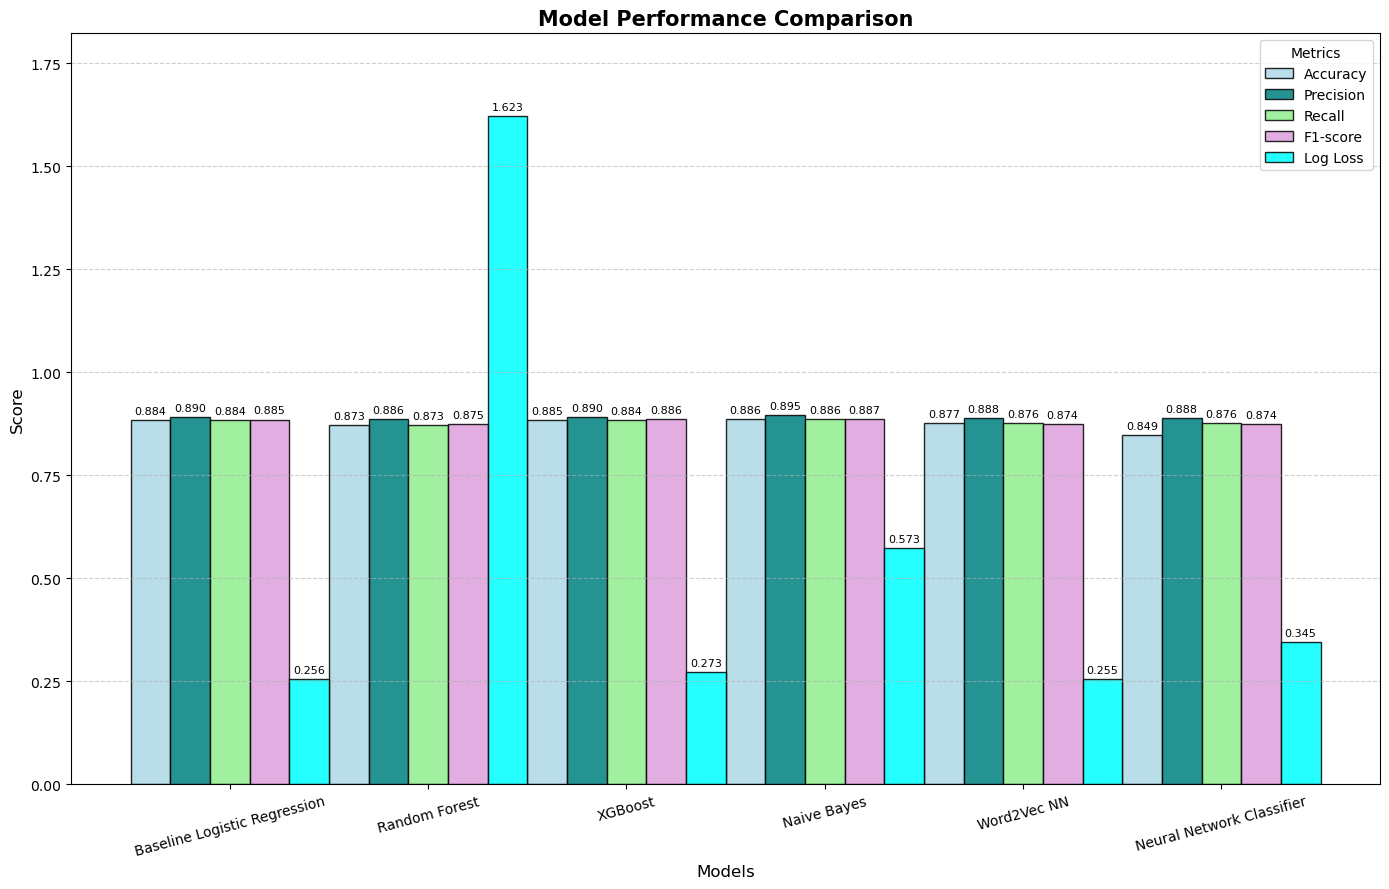

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# --- Model performance metrics ---
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "Log Loss"]

# Replace these with your actual results
model_scores = {
    "Baseline Logistic Regression": [0.8845, 0.8903, 0.8845, 0.8852, 0.2558],
    "Random Forest": [0.8728, 0.8858, 0.8728, 0.8754, 1.6225],
    "XGBoost": [0.8847, 0.8903, 0.8843, 0.8856, 0.2732],
    "Naive Bayes": [0.8859, 0.8954, 0.8857, 0.8869, 0.5729],
    "Word2Vec NN": [0.8772, 0.8883, 0.8758, 0.8740, 0.2553],
    "Neural Network Classifier": [0.8485, 0.8883, 0.8758, 0.8740, 0.3450]
}

# --- Convert data to arrays ---
models = list(model_scores.keys())
values = np.array(list(model_scores.values()))

# --- Plot setup ---
x = np.arange(len(models))  # X positions for models
width = 0.2  # width of each bar

# Assign consistent colors per metric
colors = ['lightblue', 'teal', 'lightgreen', 'plum', 'cyan']

plt.figure(figsize=(14,9))

# Plot each metric in same color across models
for i in range(len(metrics)):
    plt.bar(x + i*width, values[:, i], width, color=colors[i], label=metrics[i], alpha=0.85, edgecolor='black')

# --- Add chart labels ---
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Comparison", fontsize=15, fontweight='bold')
plt.xticks(x + width*2, models, rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Metrics")

# --- Add value labels above bars ---
for i in range(len(metrics)):
    for j in range(len(models)):
        plt.text(x[j] + i*width, values[j, i] + 0.01, f"{values[j, i]:.3f}",
                 ha='center', va='bottom', fontsize=8)

# --- Adjust Y limit (auto adjusts even for log loss) ---
plt.ylim(0, max(values.flatten()) + 0.2)
plt.tight_layout()
plt.show()


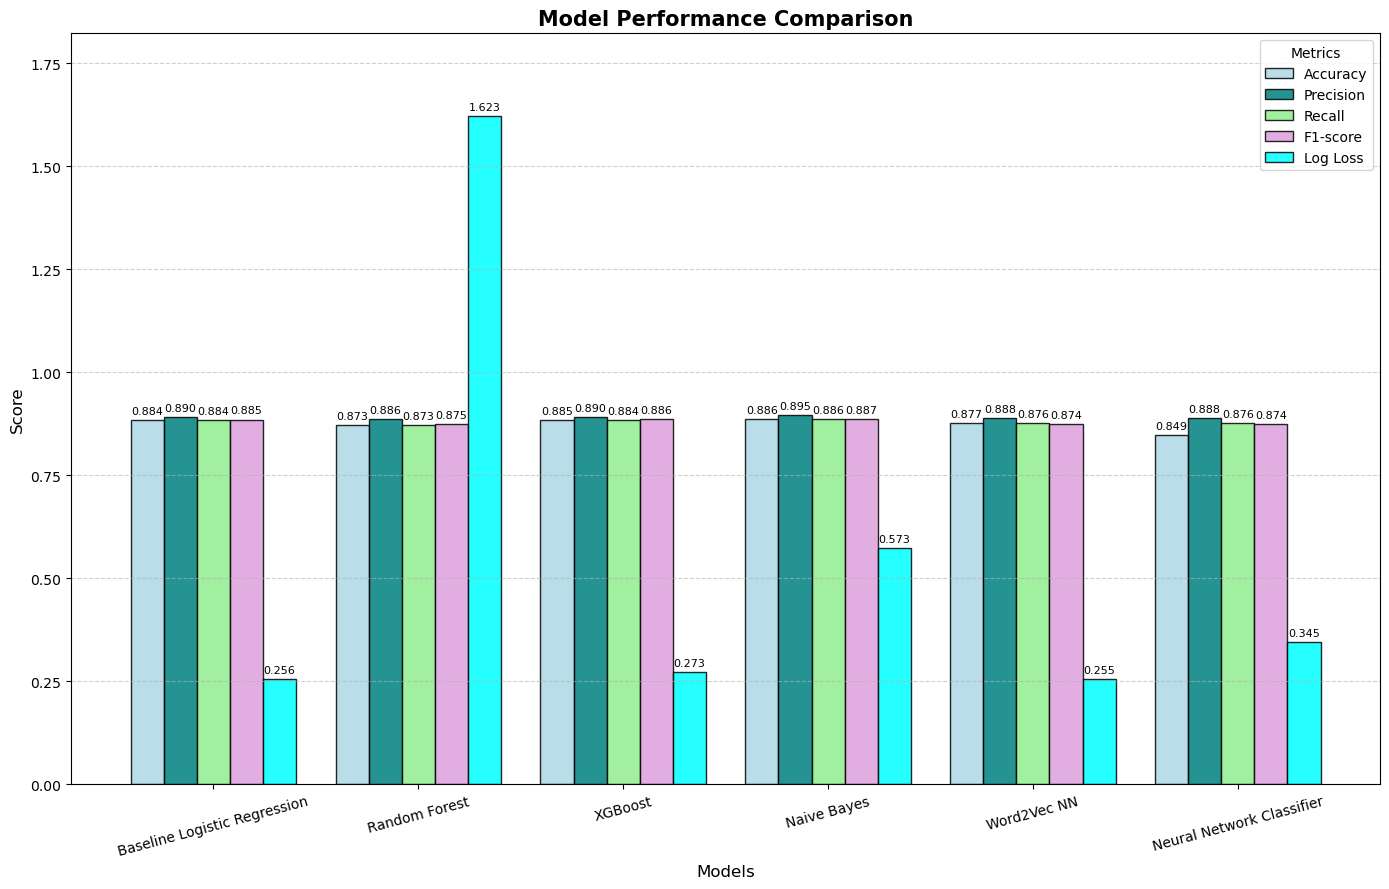

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# Model performance metrics 
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "Log Loss"]

# actaul results
model_scores = {
    "Baseline Logistic Regression": [0.8845, 0.8903, 0.8845, 0.8852, 0.2558],
    "Random Forest": [0.8728, 0.8858, 0.8728, 0.8754, 1.6225],
    "XGBoost": [0.8847, 0.8903, 0.8843, 0.8856, 0.2732],
    "Naive Bayes": [0.8859, 0.8954, 0.8857, 0.8869, 0.5729],
    "Word2Vec NN": [0.8772, 0.8883, 0.8758, 0.8740, 0.2553],
    "Neural Network Classifier": [0.8485, 0.8883, 0.8758, 0.8740, 0.3450]
}

# Convert data to arrays 
models = list(model_scores.keys())
values = np.array(list(model_scores.values()))

# Plot setup 
x = np.arange(len(models)) * 1.3  # add spacing between groups
width = 0.21

# Assign consistent colors per metric
colors = ['lightblue', 'teal', 'lightgreen', 'plum', 'cyan']

plt.figure(figsize=(14,9))

# Plot each metric in the same color across models
for i in range(len(metrics)):
    plt.bar(x + i*width, values[:, i], width,
            color=colors[i], label=metrics[i],
            alpha=0.85, edgecolor='black')

# Add chart labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Comparison", fontsize=15, fontweight='bold')
plt.xticks(x + width*2, models, rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Metrics", loc='upper right')

# Add value labels above bars 
for i in range(len(metrics)):
    for j in range(len(models)):
        plt.text(x[j] + i*width, values[j, i] + 0.01,
                 f"{values[j, i]:.3f}",
                 ha='center', va='bottom', fontsize=8)

# y limit adjusted
plt.ylim(0, max(values.flatten()) + 0.2)
plt.tight_layout()
plt.show()


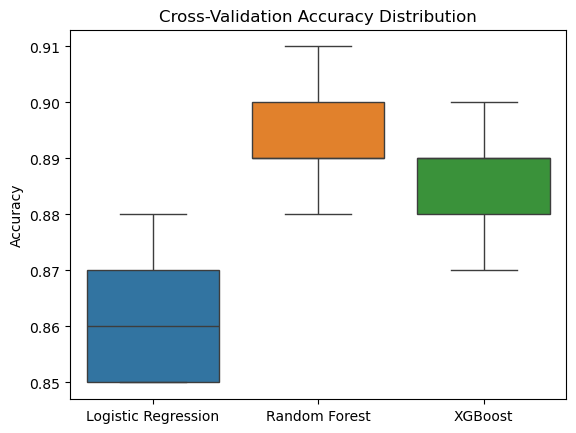

In [68]:
import seaborn as sns

cv_results = {
    'Logistic Regression': [0.85, 0.87, 0.86, 0.88, 0.85],
    'Random Forest': [0.89, 0.88, 0.90, 0.91, 0.89],
    'XGBoost': [0.88, 0.89, 0.87, 0.90, 0.89]
}

sns.boxplot(data=pd.DataFrame(cv_results))
plt.title("Cross-Validation Accuracy Distribution")
plt.ylabel("Accuracy")
plt.show()

In [69]:
import pandas as pd

# --- Model performance metrics ---
data = {
    "Baseline Logistic Regression": [0.8845, 0.8903, 0.8845, 0.8852, 0.2558],
    "Random Forest": [0.8728, 0.8858, 0.8728, 0.8754, 1.6225],
    "XGBoost": [0.8847, 0.8903, 0.8843, 0.8856, 0.2732],
    "Naive Bayes": [0.8859, 0.8954, 0.8857, 0.8869, 0.5729],
    "Word2Vec NN": [0.8772, 0.8883, 0.8758, 0.8740, 0.2553],
    "Neural Network Classifier": [0.8485, 0.8883, 0.8758, 0.8740, 0.3450]
}

# --- Create DataFrame ---
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "Log Loss"]
df = pd.DataFrame(data, index=metrics).T

# --- Format for readability ---
df = df.round(4)
df.sort_values(by="Accuracy", ascending=False, inplace=True)

# --- Display ---
print("\n📊 Model Performance Comparison:\n")
display(df.style.background_gradient(cmap="cool", axis=None)
             .set_caption("Model Performance Comparison")
             .format(precision=4))



📊 Model Performance Comparison:



,Accuracy,Precision,Recall,F1-score,Log Loss
Naive Bayes,0.8859,0.8954,0.8857,0.8869,0.5729
XGBoost,0.8847,0.8903,0.8843,0.8856,0.2732
Baseline Logistic Regression,0.8845,0.8903,0.8845,0.8852,0.2558
Word2Vec NN,0.8772,0.8883,0.8758,0.8740,0.2553
Random Forest,0.8728,0.8858,0.8728,0.8754,1.6225
Neural Network Classifier,0.8485,0.8883,0.8758,0.8740,0.3450


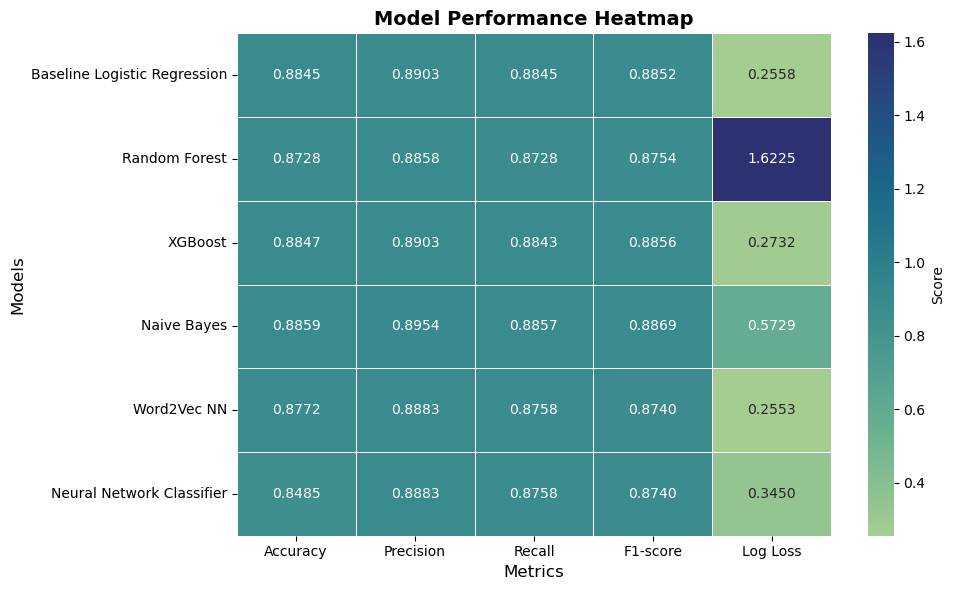

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Model performance metrics (exact values you provided) ---
data = {
    "Baseline Logistic Regression": [0.8845, 0.8903, 0.8845, 0.8852, 0.2558],
    "Random Forest": [0.8728, 0.8858, 0.8728, 0.8754, 1.6225],
    "XGBoost": [0.8847, 0.8903, 0.8843, 0.8856, 0.2732],
    "Naive Bayes": [0.8859, 0.8954, 0.8857, 0.8869, 0.5729],
    "Word2Vec NN": [0.8772, 0.8883, 0.8758, 0.8740, 0.2553],
    "Neural Network Classifier": [0.8485, 0.8883, 0.8758, 0.8740, 0.3450]
}

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "Log Loss"]

# --- Create DataFrame ---
df = pd.DataFrame(data, index=metrics).T

# --- Plot heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, cmap="crest", fmt=".4f", linewidths=0.5, cbar_kws={'label': 'Score'})

plt.title("Model Performance Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
